# Applied Deep Learning
# Group 8 - Insurance Fraud Detection coursework

## Task 1: The detection rate and the hit rate 

The detection rate refers to the percentage of cases that are flagged by a fraud detection system as potentially fraudulent which requires further investigation, out of all the cases. The hit rate refers to the percentage of actual fraud cases that are identified by a fraud detection system, out of all the cases that are further investigated. 

High detection rates indicate that the system is flagging a high number of cases for further review, which can help identify potential fraud. However, since there are over 10,000 claims in the dataset, high detection rates may give rise to a high estimated cost of time and money spent on the manual investigation. If the hit rate is low, it may indicate that the system is flagging too many cases, including false positives, which can not only lead to additional time and costs but also result in overlooking the real frauds due to insufficient human capacity or budget.

Conversely, a high hit rate means that the system is correctly identifying a high percentage of actual fraud cases, which can help prevent significant losses for the insurer. This will potentially reduce premiums and raise reimbursement rates, which will benefit policyholders and thus help the insurance company gain a good reputation and expand its customer base. However, if the detection rate is low, it may indicate that the system is not flagging enough cases for review, which could result in missed opportunities to detect fraud even if the hit rate is high.

Ultimately, insurers aim to strike a balance between the hit rate h and detection rate d and our objective is to evaluate a model which can help to flag a moderate but sufficient number of suspicious cases for further review which allows us to find the 100 frauds as accurate as possible. 
 

## Task 2: Data Pre-processing

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
import tensorflow as tf

import keras_tuner as kt
import random

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import log_loss, precision_score, roc_auc_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve
from sklearn.tree import plot_tree
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.metrics import recall_score
from sklearn import metrics

from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz


In [3]:
from sklearn.metrics import f1_score

In [4]:
# Loading the dataset
df_insurance_claims = pd.read_csv("./Insurance_claims.csv")

In [5]:
# Have a look at the first rows of the dataset
df_insurance_claims.head()

,ReferenceId,PolicyholderNumber,FirstPartyVehicleNumber,ThirdPartyVehicleNumber,InsurerNotes,PolicyholderOccupation,LossDate,FirstPolicySubscriptionDate,ClaimCause,ClaimInvolvedCovers,...,NumberOfPoliciesOfPolicyholder,FpVehicleAgeMonths,EasinessToStage,ClaimWihoutIdentifiedThirdParty,ClaimAmount,LossHour,PolicyHolderAge,NumberOfBodilyInjuries,FirstPartyLiability,Fraud
0,4842,531112,715507.0,NaN,avoids a cat and hits a garage pole With deduc...,CivilServant,1/2/19,6/18/18,CollisionWithAnimal,MaterialDamages ActLiability,...,1,104.0,0.25,1,4624.73,8.0,45.0,0,1.0,0
1,4844,87170,71164.0,NaN,accident only expert contacts us to inform us ...,Worker,1/2/19,6/29/17,LossOfControl,MaterialDamages ActLiability,...,3,230.0,0.50,1,1606.81,11.0,20.0,0,1.0,0
2,4848,98706,442609.0,NaN,ae Miss/ for garage change A/ setting up EAD/ ...,Worker,1/2/19,2/5/17,AccidentWithIdentifiedThirdParty,MaterialDamages ActLiability,...,9,93.0,0.25,0,998.20,18.0,32.0,0,0.5,0
3,4849,38240,24604.0,NaN,"awaiting report to determine rc, no box checke...",CivilServant,1/2/19,1/21/17,AccidentWithIdentifiedThirdParty,MaterialDamages ActLiability ReplacementVehicle,...,2,56.0,0.25,0,2506.92,11.0,46.0,0,0.5,0
4,4850,11339,2933.0,229134.0,Insured in THIRD-PARTY formula Insured in a su...,Farmer,1/2/19,1/13/18,AccidentWithIdentifiedThirdParty,ActLiability,...,4,110.0,0.25,0,12.00,12.0,28.0,0,0.0,0


In [6]:
# Check the datatype of null values of each column
df_insurance_claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11530 entries, 0 to 11529
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ReferenceId                      11530 non-null  int64  
 1   PolicyholderNumber               11530 non-null  int64  
 2   FirstPartyVehicleNumber          11035 non-null  float64
 3   ThirdPartyVehicleNumber          379 non-null    float64
 4   InsurerNotes                     9173 non-null   object 
 5   PolicyholderOccupation           11187 non-null  object 
 6   LossDate                         11530 non-null  object 
 7   FirstPolicySubscriptionDate      11530 non-null  object 
 8   ClaimCause                       11333 non-null  object 
 9   ClaimInvolvedCovers              11335 non-null  object 
 10  DamageImportance                 738 non-null    object 
 11  FirstPartyVehicleType            11518 non-null  object 
 12  ConnectionBetweenP

### Working on the missing values

In [7]:
# Check the missing values
df_insurance_claims.isna().sum()

ReferenceId                            0
PolicyholderNumber                     0
FirstPartyVehicleNumber              495
ThirdPartyVehicleNumber            11151
InsurerNotes                        2357
PolicyholderOccupation               343
LossDate                               0
FirstPolicySubscriptionDate            0
ClaimCause                           197
ClaimInvolvedCovers                  195
DamageImportance                   10792
FirstPartyVehicleType                 12
ConnectionBetweenParties           11432
LossPostCode                        1408
PolicyHolderPostCode                   0
PolicyWasSubscribedOnInternet          0
NumberOfPoliciesOfPolicyholder         0
FpVehicleAgeMonths                    12
EasinessToStage                        0
ClaimWihoutIdentifiedThirdParty        0
ClaimAmount                            0
LossHour                              94
PolicyHolderAge                       36
NumberOfBodilyInjuries                 0
FirstPartyLiabil

In [8]:
# List the columns with missing values
nan_cols = df_insurance_claims.columns[df_insurance_claims.isna().any()].tolist()
nan_cols

['FirstPartyVehicleNumber',
 'ThirdPartyVehicleNumber',
 'InsurerNotes',
 'PolicyholderOccupation',
 'ClaimCause',
 'ClaimInvolvedCovers',
 'DamageImportance',
 'FirstPartyVehicleType',
 'ConnectionBetweenParties',
 'LossPostCode',
 'FpVehicleAgeMonths',
 'LossHour',
 'PolicyHolderAge']

In [9]:
# checking if there are any claims where the vehicle numbers of the first and thrid parties are the same.
# There are none
df_insurance_claims.loc[df_insurance_claims["FirstPartyVehicleNumber"]==df_insurance_claims['ThirdPartyVehicleNumber']]

,ReferenceId,PolicyholderNumber,FirstPartyVehicleNumber,ThirdPartyVehicleNumber,InsurerNotes,PolicyholderOccupation,LossDate,FirstPolicySubscriptionDate,ClaimCause,ClaimInvolvedCovers,...,NumberOfPoliciesOfPolicyholder,FpVehicleAgeMonths,EasinessToStage,ClaimWihoutIdentifiedThirdParty,ClaimAmount,LossHour,PolicyHolderAge,NumberOfBodilyInjuries,FirstPartyLiability,Fraud


In [10]:
# Check the unique values of column "ClaimCause"
df_insurance_claims['ClaimCause'].unique()

array(['CollisionWithAnimal', 'LossOfControl',
       'AccidentWithIdentifiedThirdParty', 'WindscreenDamage',
       'AccidentWithUnidentifiedThirdParty', 'Vandalism', 'TheftAttempt',
       'MultiVehicleCrash', nan, 'CollisionWithPedestrian', 'TotalTheft',
       'Fire', 'AccidentOrCollision', 'TheftOfExteriorElements', 'Storm',
       'LegalProtection', 'Hail', 'ForcesOfNature', 'Flood'], dtype=object)

In [11]:
# We do not know if there are missing values 
# because the data is really missing in the column of Occupation or because they are unemployed
# Hence, we want to check the unique values of column 'PolicyholderOccupation'
# There is a value named 'Unemployed' so the missing values are the ones really missing
df_insurance_claims['PolicyholderOccupation'].unique()

array(['CivilServant', 'Worker', 'Farmer', 'Employee', 'Executive',
       'Merchant', 'Retired', 'Student', 'Unemployed', nan,
       'SelfEmployed', 'HeadOfCompany'], dtype=object)

In [12]:
# Check the unique values of column 'InsurerNotes'
# The values of this column are full of text, which might require NLP
df_insurance_claims['InsurerNotes'].unique()

array(['avoids a cat and hits a garage pole With deductible XXX mail insured, from XX/XX, asking how to tow, because the water tank would be pierced, saw garage, have it well and have even started to do the work',
       "accident only expert contacts us to inform us of the change of garage no a= no PEC= expert informs deductible XXX? For settlement *Awaiting expert report for settlement *AS expert to request insured mother's report for follow-up payment report received => I pay the franchise deducted",
       'ae Miss/ for garage change A/ setting up EAD/ franchise XXX? while waiting for MEC Tiers to return to see if possible recourse in the absence of a countersigned statement, the insured will not be repaired until it is certain of the recourse on a roundabout. Tiers located on the left deflects and hits the vehicle of our insured KXXX Observation - I am exchanging decla opposing company Mrs. for follow-up: mail exchange decla address today report in estimate. insured call? for reco

In [13]:
# Check the value counts of column 'DamageImportance'
# There are only two levels: TotalLoss and Medium
df_insurance_claims['DamageImportance'].value_counts()

TotalLoss    677
Medium        61
Name: DamageImportance, dtype: int64

In [14]:
# Check the values counts of column 'ConnectionBetweenParties'
df_insurance_claims['ConnectionBetweenParties'].value_counts()

SameAddress        80
SamePolice         12
SameEmail           3
SamePhone           2
SameBankAccount     1
Name: ConnectionBetweenParties, dtype: int64

In [15]:
# We are not sure if the missing data in the column 'ConnectionBetweenParties' 
# are really missing or because they do not have any connections
# We decided to add the value 'NoConnection' to the missing values
df_insurance_claims['ConnectionBetweenParties'] = df_insurance_claims['ConnectionBetweenParties'].replace(np.nan, 'noconnection')

In [16]:
# Check the values counts of columns ConnectionBetweenParties after imputing
df_insurance_claims['ConnectionBetweenParties'].value_counts()

noconnection       11432
SameAddress           80
SamePolice            12
SameEmail              3
SamePhone              2
SameBankAccount        1
Name: ConnectionBetweenParties, dtype: int64

In [17]:
# Check the number of unique values of column 'LossPostCode'
# There are 3005 unique values so it is hard to fill in the missing values
len(df_insurance_claims['LossPostCode'].unique())

3005

In [18]:
# Sort the unique values of Vehicle Age Months
sorted(df_insurance_claims['FpVehicleAgeMonths'].unique())

[0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 7.0,
 15.0,
 26.0,
 28.0,
 29.0,
 35.0,
 39.0,
 41.0,
 55.0,
 59.0,
 63.0,
 75.0,
 77.0,
 80.0,
 84.0,
 89.0,
 90.0,
 92.0,
 95.0,
 112.0,
 113.0,
 121.0,
 122.0,
 125.0,
 147.0,
 148.0,
 151.0,
 154.0,
 162.0,
 164.0,
 166.0,
 168.0,
 171.0,
 174.0,
 175.0,
 178.0,
 183.0,
 189.0,
 194.0,
 200.0,
 201.0,
 204.0,
 206.0,
 207.0,
 211.0,
 212.0,
 219.0,
 220.0,
 223.0,
 226.0,
 227.0,
 228.0,
 229.0,
 234.0,
 235.0,
 236.0,
 237.0,
 239.0,
 240.0,
 241.0,
 245.0,
 246.0,
 247.0,
 248.0,
 249.0,
 250.0,
 254.0,
 255.0,
 262.0,
 265.0,
 266.0,
 267.0,
 276.0,
 277.0,
 279.0,
 288.0,
 291.0,
 294.0,
 296.0,
 304.0,
 305.0,
 306.0,
 308.0,
 313.0,
 314.0,
 324.0,
 326.0,
 330.0,
 340.0,
 352.0,
 373.0,
 377.0,
 416.0,
 421.0,
 nan,
 -4.0,
 -1.0,
 6.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 27.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 36.0,
 37.0,
 38.0,
 40.0,
 42.0,
 43.0,
 44.0

In [19]:
# Impute the missing values of column FpVehicleAgeMonths with a number out of the positive range, for example, we chose -111 in this case 
df_insurance_claims['FpVehicleAgeMonths'] = df_insurance_claims['FpVehicleAgeMonths'].replace(np.nan, -111)

In [20]:
# Checking the correlations of Fraud status with other features
df_insurance_claims.corr(method ='pearson')

/var/folders/4c/6jy3z6sn7zg_n_24fwj6v_xw0000gn/T/ipykernel_51928/943198488.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_insurance_claims.corr(method ='pearson')


,ReferenceId,PolicyholderNumber,FirstPartyVehicleNumber,ThirdPartyVehicleNumber,PolicyWasSubscribedOnInternet,NumberOfPoliciesOfPolicyholder,FpVehicleAgeMonths,EasinessToStage,ClaimWihoutIdentifiedThirdParty,ClaimAmount,LossHour,PolicyHolderAge,NumberOfBodilyInjuries,FirstPartyLiability,Fraud
ReferenceId,1.000000,0.209116,0.282068,0.271636,-0.008110,0.012979,-0.001726,0.105193,0.104887,-0.065860,-0.054491,0.021388,-0.058762,-0.076372,-0.045789
PolicyholderNumber,0.209116,1.000000,0.793369,0.327929,0.190479,-0.329618,-0.019056,0.023667,-0.007363,0.042668,-0.025072,0.112914,-0.025922,-0.009534,0.022482
FirstPartyVehicleNumber,0.282068,0.793369,1.000000,0.404662,0.196522,-0.223095,-0.026850,0.021291,-0.002183,0.042396,-0.020693,0.085038,-0.026183,-0.021531,0.016646
ThirdPartyVehicleNumber,0.271636,0.327929,0.404662,1.000000,0.157980,-0.193787,0.095110,-0.036111,0.033128,0.065934,-0.130910,-0.015475,0.027601,-0.099609,-0.031976
PolicyWasSubscribedOnInternet,-0.008110,0.190479,0.196522,0.157980,1.000000,-0.186533,-0.007225,-0.047005,-0.056639,-0.014952,0.017985,-0.141683,0.001283,0.008203,0.024539
NumberOfPoliciesOfPolicyholder,0.012979,-0.329618,-0.223095,-0.193787,-0.186533,1.000000,0.035729,0.012080,0.036546,-0.020861,0.000018,-0.026783,0.013496,-0.031755,-0.036993
FpVehicleAgeMonths,-0.001726,-0.019056,-0.026850,0.095110,-0.007225,0.035729,1.000000,-0.013723,-0.071952,-0.096283,-0.051698,-0.097592,0.027982,0.005526,-0.000535
EasinessToStage,0.105193,0.023667,0.021291,-0.036111,-0.047005,0.012080,-0.013723,1.000000,0.702388,-0.161865,-0.453227,0.043831,-0.381293,-0.179213,-0.024864
ClaimWihoutIdentifiedThirdParty,0.104887,-0.007363,-0.002183,0.033128,-0.056639,0.036546,-0.071952,0.702388,1.000000,-0.140430,-0.405504,0.023612,-0.134350,-0.266417,-0.026088
ClaimAmount,-0.065860,0.042668,0.042396,0.065934,-0.014952,-0.020861,-0.096283,-0.161865,-0.140430,1.000000,0.159222,0.020991,0.181512,0.231267,0.083520


In [21]:
# Convert the dates to datetime objects
df_insurance_claims["LossDate"] = pd.to_datetime(df_insurance_claims["LossDate"])
df_insurance_claims["FirstPolicySubscriptionDate"] = pd.to_datetime(df_insurance_claims["FirstPolicySubscriptionDate"])

In [22]:
# Calculate the days between First Policy Subcription Date and Loss Date, name that column 'Days'
df_insurance_claims["Days"] = df_insurance_claims["LossDate"] - df_insurance_claims["FirstPolicySubscriptionDate"]
df_insurance_claims["Days"] = pd.to_numeric(df_insurance_claims["Days"].dt.days, downcast='integer')

In [23]:
df_insurance_claims = df_insurance_claims.astype({"Days": "int64"})

In [24]:
df_insurance_claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11530 entries, 0 to 11529
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   ReferenceId                      11530 non-null  int64         
 1   PolicyholderNumber               11530 non-null  int64         
 2   FirstPartyVehicleNumber          11035 non-null  float64       
 3   ThirdPartyVehicleNumber          379 non-null    float64       
 4   InsurerNotes                     9173 non-null   object        
 5   PolicyholderOccupation           11187 non-null  object        
 6   LossDate                         11530 non-null  datetime64[ns]
 7   FirstPolicySubscriptionDate      11530 non-null  datetime64[ns]
 8   ClaimCause                       11333 non-null  object        
 9   ClaimInvolvedCovers              11335 non-null  object        
 10  DamageImportance                 738 non-null    object   

/var/folders/4c/6jy3z6sn7zg_n_24fwj6v_xw0000gn/T/ipykernel_51928/3239715344.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_insurance_claims.corr(), cmap="YlGnBu")


<AxesSubplot:>

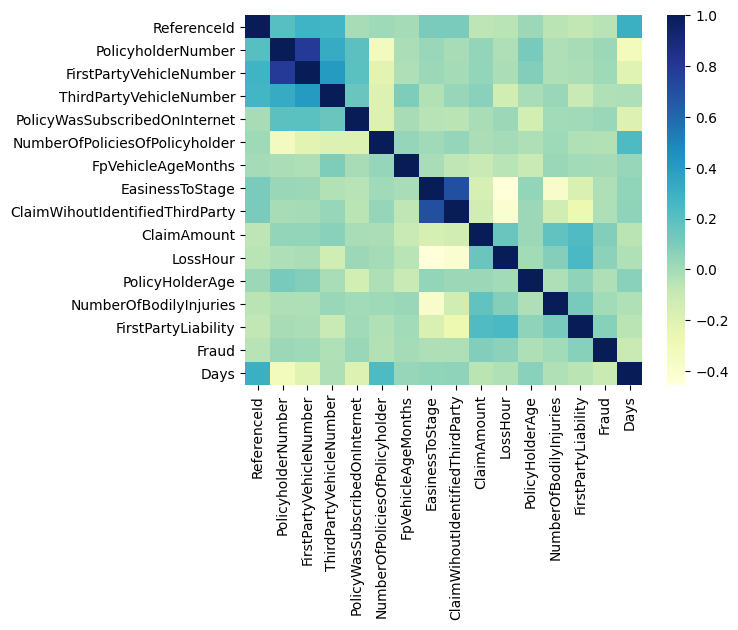

In [25]:
# Checking the correlations via the correlation heatmap
sns.heatmap(df_insurance_claims.corr(), cmap="YlGnBu")

Correlation between Claimwithoutidentifiedthirdparty and Easinesstostage is high. This is reasonable as during a vehicle crash, it would be strange if the one who claims does not know who involves. Therefore, the crash is likely to be staged. 

Correlation between FirstPartyVehicleNumber and PolicyholderNumber is high which is reasonable as the insurance company might take the Vehicle number as the PolicyholderNumber when they register for insurance. However, this information may not add much value since both of them are unique values (IDs in this case)

In [26]:
# Are the policy numbers unique, or are there any people who filed claims multiple times
def get_uniqueness(df, column_names):
    for column_name in column_names:
        print("{}: Column length: {}, unique values: {}".format(column_name, len(df[column_name]), df[column_name].nunique()))

get_uniqueness(df_insurance_claims, ["PolicyholderNumber"])

# Create a new column with count of claims made by the same policy holder.
# Multiple claims by the same policy holder may likely indicate a fraud.
counts_policy_holder = df_insurance_claims['PolicyholderNumber'].value_counts()
df_insurance_claims["PolicyHolderCount"] = df_insurance_claims["PolicyholderNumber"].map(counts_policy_holder)
df_insurance_claims[["PolicyholderNumber", "PolicyHolderCount"]]

PolicyholderNumber: Column length: 11530, unique values: 9404


,PolicyholderNumber,PolicyHolderCount
0,531112,1
1,87170,2
2,98706,2
3,38240,1
4,11339,4
...,...,...
11525,452486,1
11526,581104,1
11527,817231,1
11528,321534,2


In [27]:
# # Column ClaimInvolvedCovers contains a space sepaated list of strings indicating the covers that the individual took
# # We convert this into onehot encoded columns
one_hot = pd.get_dummies(df_insurance_claims["ClaimInvolvedCovers"].str.split(" ", expand=True).stack()).groupby(level=0).sum()
df_insurance_claims = pd.concat([df_insurance_claims, one_hot], axis=1)

We decided to drop these columns based on the below main reasons: 
- Those are the unique numbers such as IDs (ReferenceID, PolicyholderNumber, FirstPartyVehicleNumber, ThirdPartyVehicleNumber, InsurerNotes)
- The columns have too many missing values (DamageImportance, ConnectionBetweenParties)
- The values are the postcodes of the addresses (LossPostCode, PolicyHolderPostCode)


In [28]:
# Remove the columns that have too many missing values and unnecessary comlumns such as Reference ID, PolicyHolderPostcode
df_insurance_claims.drop(columns = [
    "ReferenceId",                     # unique 
    "PolicyholderNumber",              # unique
    "FirstPartyVehicleNumber",         # unique    
    "ThirdPartyVehicleNumber",         # unique
    "InsurerNotes",                    # dropping for now
    "DamageImportance",                # too many nans
    #"ConnectionBetweenParties",        # we can fill
    "LossPostCode",                    # not necessary
    "PolicyHolderPostCode",            # not necessary
    # "LossDate",
    # "FirstPolicySubscriptionDate",             
    'ClaimInvolvedCovers'
    ], inplace=True)

In [29]:
# Drop the duplicate rows
df_insurance_claims.drop_duplicates(inplace=True)
df_insurance_claims

,PolicyholderOccupation,LossDate,FirstPolicySubscriptionDate,ClaimCause,FirstPartyVehicleType,ConnectionBetweenParties,PolicyWasSubscribedOnInternet,NumberOfPoliciesOfPolicyholder,FpVehicleAgeMonths,EasinessToStage,...,Fire,MaterialDamages,MedicalCare,NaturalCatastrophes,ReplacementVehicle,RiderClothes,Theft,ThirdParty,ThirdPartyMaterialDamages,Windscreen
0,CivilServant,2019-01-02,2018-06-18,CollisionWithAnimal,Car,noconnection,1,1,104.0,0.25,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Worker,2019-01-02,2017-06-29,LossOfControl,Car,noconnection,0,3,230.0,0.50,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Worker,2019-01-02,2017-02-05,AccidentWithIdentifiedThirdParty,Car,noconnection,0,9,93.0,0.25,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,CivilServant,2019-01-02,2017-01-21,AccidentWithIdentifiedThirdParty,Car,noconnection,0,2,56.0,0.25,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,Farmer,2019-01-02,2018-01-13,AccidentWithIdentifiedThirdParty,Car,noconnection,0,4,110.0,0.25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11525,Employee,2021-02-17,2019-03-15,WindscreenDamage,Car,noconnection,0,1,85.0,0.50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11526,Employee,2021-03-07,2017-07-20,WindscreenDamage,Car,noconnection,0,3,119.0,0.50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11527,Employee,2021-03-15,2020-09-30,WindscreenDamage,Car,noconnection,0,4,139.0,0.50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11528,CivilServant,2021-03-06,2018-12-28,WindscreenDamage,Car,noconnection,0,6,105.0,0.50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [30]:
# Compare the 2 Fraud statuses: 
#sns.pairplot(df_new, hue='Fraud')

#We can see from the plot that the dataset is unbalanced. 


# Task 3: Model 1

#### For the model 1, we want to find out which claims are suspicious if the incident occurs within t days of subscription date. Therefore, we only need columns:
- FirstPolicySubscriptionDate
- LossDate
- Days
- Fraud

In [31]:
df_insurance_claims_model_1 = df_insurance_claims[["LossDate", "FirstPolicySubscriptionDate", "Fraud", "Days"]]
df_insurance_claims_model_1

,LossDate,FirstPolicySubscriptionDate,Fraud,Days
0,2019-01-02,2018-06-18,0,198
1,2019-01-02,2017-06-29,0,552
2,2019-01-02,2017-02-05,0,696
3,2019-01-02,2017-01-21,0,711
4,2019-01-02,2018-01-13,0,354
...,...,...,...,...
11525,2021-02-17,2019-03-15,0,705
11526,2021-03-07,2017-07-20,0,1326
11527,2021-03-15,2020-09-30,0,166
11528,2021-03-06,2018-12-28,0,799


In [32]:
df_insurance_claims_model_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11516 entries, 0 to 11529
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   LossDate                     11516 non-null  datetime64[ns]
 1   FirstPolicySubscriptionDate  11516 non-null  datetime64[ns]
 2   Fraud                        11516 non-null  int64         
 3   Days                         11516 non-null  int64         
dtypes: datetime64[ns](2), int64(2)
memory usage: 449.8 KB


#### Determine the range of the t days

In [33]:
df_fraud = df_insurance_claims_model_1.loc[df_insurance_claims_model_1["Fraud"] == 1]

In [34]:
df_fraud

,LossDate,FirstPolicySubscriptionDate,Fraud,Days
523,2019-02-22,2019-02-22,1,0
653,2019-02-28,2019-02-28,1,0
692,2019-03-06,2019-02-11,1,23
697,2019-03-02,2019-02-28,1,2
772,2019-03-05,2019-02-22,1,11
...,...,...,...,...
9768,2020-10-03,2020-10-01,1,2
10147,2020-11-03,2020-11-01,1,2
10166,2020-11-04,2020-11-02,1,2
10181,2020-10-05,2020-10-05,1,0


In [35]:
# The maximum value of t
df_fraud["Days"].max()

1201

In [36]:
# The minimum value of t
df_fraud["Days"].min()

0

In [37]:
# Set up the range of t days
t = range(1202)

#### We calculated the detection rate and hit rate based on the each t days
- The calculation formula of detection rate is:
$$
  Detection\ Rate =\frac{The\ Number\ of\ Detection}{Total\ Number\ of\ Observation}\, *100\%
$$
- The calculation formula of hit rate is:
$$
  Hit\ Rate =\frac{The\ Number\ of\ Real\ Fraud}{The\ Number\ of\ Detection}\, *100\%
$$


In [38]:
def detect_fraudulent_claims_model_1(day_thresholds_to_check, df_datasets):
    
    # All_detection rate
    detection_rates = []
    # All hit rate
    hit_rates = []
    # All predictions 
    all_predictions = []
    
    for day_threshold in day_thresholds_to_check:
        # All prediction based on each t
        current_predictions = []
        # The number of detection
        suspicion_count = 0
        # The number of real fraud
        true_fraud_count = 0
        
        for row_index in range(len(df_datasets)):
            # Flag as fraud if the number of days since activation is less than the threshold
            if df_datasets["Days"][row_index] <= day_threshold:
                suspicion_count = suspicion_count + 1
                current_predictions.append(1)

                if df_datasets["Fraud"][row_index] == 1:
                    true_fraud_count = true_fraud_count + 1

            else:
                current_predictions.append(0)
        
        detection_rate = round((suspicion_count / len(df_datasets))*100, 2)
        detection_rates.append(detection_rate)
        
        hit_rate = round((true_fraud_count / suspicion_count)*100, 2)
        hit_rates.append(hit_rate)
        
        all_predictions.append(current_predictions)

    
    return detection_rates, hit_rates, all_predictions

In [39]:
d, h, Y_all_prediction = detect_fraudulent_claims_model_1(t, df_insurance_claims_model_1.reset_index(drop=True))

### The hit rate and detection rate of this model for different values of t are:

In [40]:
#### The hit rate (from t equals 0 to 1201)
h

[34.15,
 24.66,
 28.85,
 26.45,
 23.46,
 22.34,
 21.7,
 20.38,
 19.23,
 18.81,
 18.73,
 18.45,
 17.08,
 16.27,
 16.5,
 16.04,
 15.87,
 15.63,
 15.54,
 15.31,
 14.86,
 14.31,
 14.21,
 14.04,
 14.09,
 13.87,
 13.65,
 13.4,
 13.29,
 13.16,
 12.73,
 12.47,
 12.24,
 12.05,
 11.83,
 11.64,
 11.46,
 11.24,
 11.07,
 10.86,
 10.65,
 10.48,
 10.34,
 10.18,
 9.99,
 9.83,
 9.67,
 9.58,
 9.44,
 9.26,
 9.11,
 8.97,
 8.83,
 8.73,
 8.63,
 8.52,
 8.39,
 8.23,
 8.12,
 8.01,
 7.91,
 7.82,
 7.76,
 7.65,
 7.56,
 7.44,
 7.34,
 7.23,
 7.17,
 7.09,
 7.1,
 7.08,
 7.0,
 6.92,
 6.85,
 6.79,
 6.7,
 6.63,
 6.58,
 6.5,
 6.45,
 6.37,
 6.32,
 6.26,
 6.2,
 6.15,
 6.11,
 6.05,
 5.99,
 5.92,
 5.86,
 5.81,
 5.75,
 5.7,
 5.64,
 5.59,
 5.56,
 5.53,
 5.49,
 5.45,
 5.41,
 5.37,
 5.33,
 5.3,
 5.27,
 5.22,
 5.16,
 5.13,
 5.1,
 5.07,
 5.04,
 5.01,
 4.98,
 4.96,
 4.92,
 4.89,
 4.88,
 4.84,
 4.81,
 4.8,
 4.77,
 4.76,
 4.73,
 4.7,
 4.67,
 4.63,
 4.6,
 4.57,
 4.53,
 4.5,
 4.47,
 4.44,
 4.41,
 4.39,
 4.38,
 4.35,
 4.32,
 4.31,
 4.29

In [41]:
#### The detection rate (from t equals 0 to 1201)
d

[0.36,
 0.63,
 0.9,
 1.05,
 1.41,
 1.71,
 2.04,
 2.26,
 2.48,
 2.63,
 2.74,
 2.92,
 3.15,
 3.31,
 3.53,
 3.68,
 3.83,
 4.06,
 4.25,
 4.37,
 4.56,
 4.73,
 4.89,
 5.07,
 5.18,
 5.32,
 5.47,
 5.57,
 5.75,
 5.94,
 6.14,
 6.27,
 6.38,
 6.49,
 6.61,
 6.71,
 6.82,
 6.96,
 7.06,
 7.2,
 7.34,
 7.46,
 7.55,
 7.68,
 7.82,
 7.95,
 8.08,
 8.25,
 8.37,
 8.54,
 8.67,
 8.81,
 8.94,
 9.05,
 9.16,
 9.27,
 9.41,
 9.6,
 9.73,
 9.86,
 9.99,
 10.1,
 10.19,
 10.32,
 10.46,
 10.62,
 10.77,
 10.92,
 11.03,
 11.15,
 11.25,
 11.4,
 11.53,
 11.66,
 11.79,
 11.9,
 12.06,
 12.17,
 12.28,
 12.42,
 12.52,
 12.67,
 12.78,
 12.9,
 13.02,
 13.12,
 13.23,
 13.35,
 13.48,
 13.63,
 13.79,
 13.9,
 14.05,
 14.16,
 14.31,
 14.45,
 14.53,
 14.6,
 14.72,
 14.82,
 14.94,
 15.03,
 15.15,
 15.25,
 15.33,
 15.47,
 15.65,
 15.74,
 15.82,
 15.93,
 16.02,
 16.11,
 16.2,
 16.28,
 16.41,
 16.51,
 16.56,
 16.67,
 16.79,
 16.82,
 16.92,
 16.96,
 17.06,
 17.17,
 17.31,
 17.44,
 17.56,
 17.67,
 17.82,
 17.96,
 18.06,
 18.18,
 18.3,
 18.38,


Text(0, 0.5, 'Hit Rate')

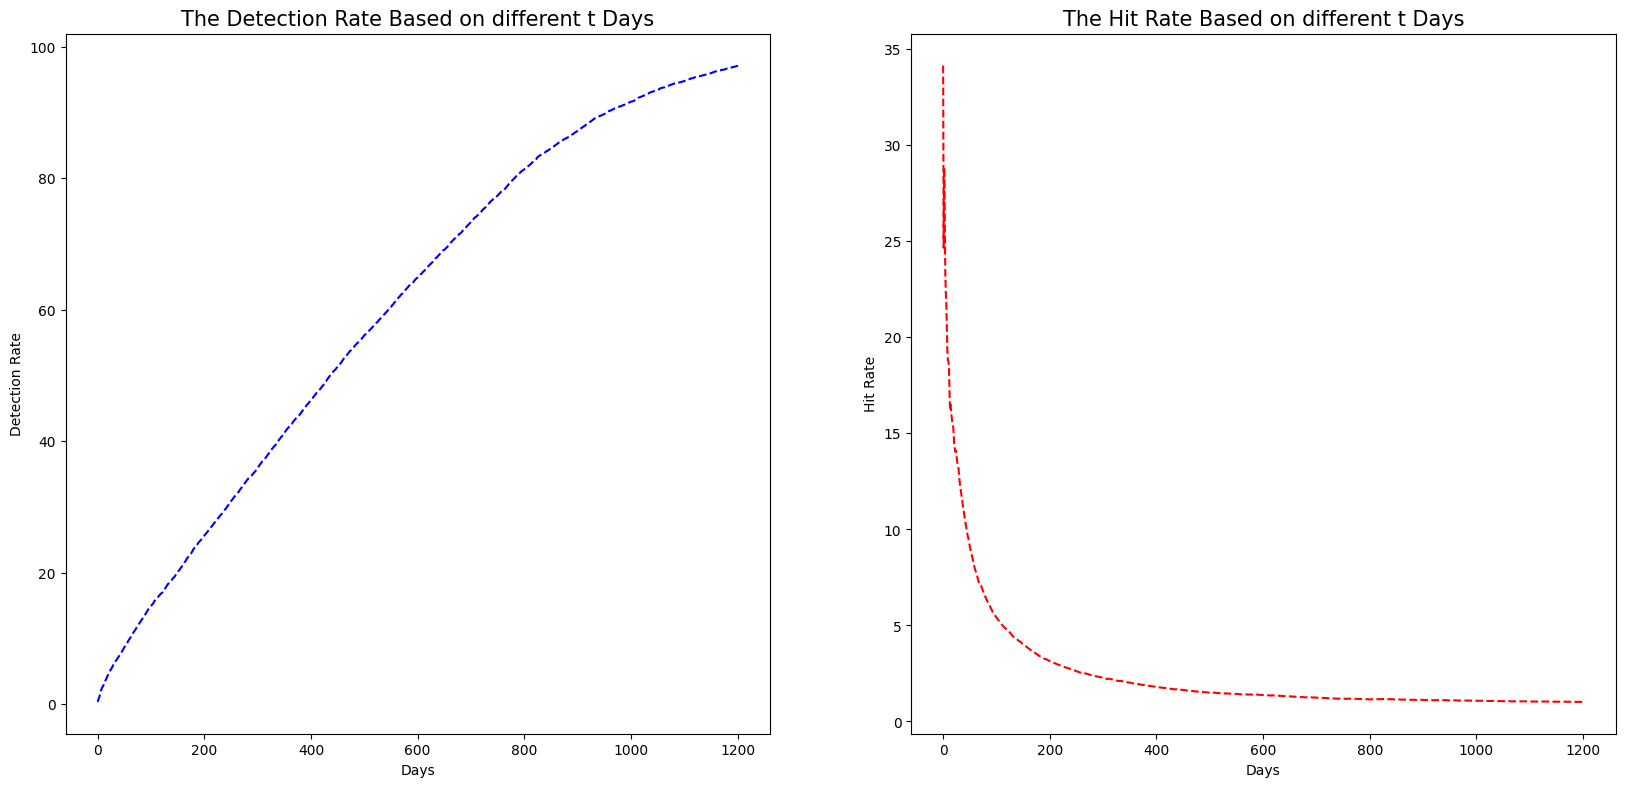

In [42]:
### Plot the results of detection rate and hit rate
fig = plt.figure(figsize = (20, 20))
AX1 = fig.add_subplot(2,2,1)
AX2 = fig.add_subplot(2,2,2)

AX1.plot(t, d, ls = "--", color = "blue")
AX2.plot(t, h, ls = "--", color = "red")

AX1.set_title("The Detection Rate Based on different t Days", fontsize = 15, horizontalalignment="center")
AX2.set_title("The Hit Rate Based on different t Days", fontsize = 15, horizontalalignment="center")

AX1.set_xlabel("Days", fontsize = 10)
AX1.set_ylabel("Detection Rate", fontsize = 10)

AX2.set_xlabel("Days", fontsize = 10)
AX2.set_ylabel("Hit Rate", fontsize = 10)

In order to choose a sensible value of t, we used Receiver Operating Characteristic(ROC) accuracy to evaluate which t is the sensible one. 

A large ROC accuracy indicates that this model with a specific t is able to accurately identify suspicious claims while minimizing the number of false positives. 

- The calculation formula of ROC accuracy is:

$$
  ROC\ Accuracy =\frac{TP\ +\ TN}{TP\ +\ TN\ +\ FP\ +\ FN}
$$


In [43]:
def get_all_roc_accuracy(y, y_hat):
    all_roc_acc = []
    for i in range(len(t)):
        roc_acc = round(metrics.roc_auc_score(y, y_hat[i]), 2)
        all_roc_acc.append(roc_acc)
    return all_roc_acc

In [44]:
all_roc_acc = get_all_roc_accuracy(df_insurance_claims_model_1["Fraud"], Y_all_prediction)

In [45]:
#### The ROC accuracy of the model (from t equals 0 to 1201)
all_roc_acc

[0.56,
 0.58,
 0.63,
 0.64,
 0.66,
 0.68,
 0.71,
 0.72,
 0.73,
 0.74,
 0.75,
 0.76,
 0.76,
 0.76,
 0.78,
 0.78,
 0.79,
 0.8,
 0.81,
 0.82,
 0.82,
 0.82,
 0.83,
 0.83,
 0.84,
 0.85,
 0.85,
 0.85,
 0.86,
 0.87,
 0.86,
 0.86,
 0.86,
 0.86,
 0.86,
 0.86,
 0.86,
 0.86,
 0.86,
 0.86,
 0.86,
 0.86,
 0.86,
 0.86,
 0.86,
 0.86,
 0.85,
 0.86,
 0.86,
 0.86,
 0.86,
 0.86,
 0.85,
 0.85,
 0.85,
 0.85,
 0.85,
 0.85,
 0.85,
 0.85,
 0.85,
 0.85,
 0.85,
 0.85,
 0.85,
 0.85,
 0.85,
 0.84,
 0.84,
 0.84,
 0.85,
 0.85,
 0.85,
 0.85,
 0.85,
 0.85,
 0.85,
 0.85,
 0.85,
 0.85,
 0.85,
 0.84,
 0.84,
 0.84,
 0.84,
 0.84,
 0.84,
 0.84,
 0.84,
 0.84,
 0.84,
 0.84,
 0.84,
 0.84,
 0.84,
 0.84,
 0.84,
 0.83,
 0.83,
 0.83,
 0.83,
 0.83,
 0.83,
 0.83,
 0.83,
 0.83,
 0.83,
 0.83,
 0.83,
 0.83,
 0.83,
 0.83,
 0.83,
 0.83,
 0.83,
 0.83,
 0.82,
 0.82,
 0.82,
 0.82,
 0.82,
 0.82,
 0.82,
 0.82,
 0.82,
 0.82,
 0.82,
 0.82,
 0.82,
 0.82,
 0.82,
 0.82,
 0.82,
 0.82,
 0.82,
 0.81,
 0.81,
 0.81,
 0.81,
 0.81,
 0.81,
 0.81,
 0.81,


Text(0, 0.5, 'ROC accuracy')

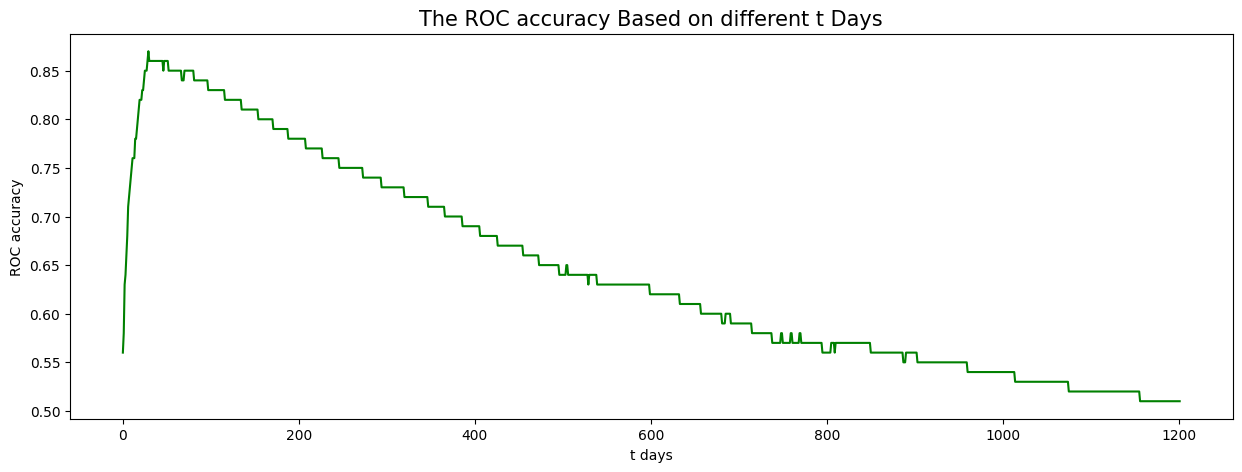

In [46]:
### Plot the ROC accuracy based on each t days
fig = plt.figure(figsize = (15, 5))
AX1 = fig.add_subplot(1,1,1)

AX1.plot(t, all_roc_acc, ls = "-", color = "green")

AX1.set_title("The ROC accuracy Based on different t Days", fontsize = 15, horizontalalignment="center")

AX1.set_xlabel("t days", fontsize = 10)
AX1.set_ylabel("ROC accuracy", fontsize = 10)


In [47]:
### Find out the sensible t of this model
for i in range(len(all_roc_acc)):
    if all_roc_acc[i] == max(all_roc_acc):
        print("The sensible t is " + str(i))
        print("The detection rate is " + str(d[i]) + "%")
        print("The hit rate is " + str(h[i]) + "%")
        print("The ROC accuracy of the model is " + str(all_roc_acc[i]))

The sensible t is 29
The detection rate is 5.94%
The hit rate is 13.16%
The ROC accuracy of the model is 0.87


### The logic underlies this model and its bias
The logic underlying this model is that when a customer subscribes to a service, it is more likely that fraudulent claims will be made shortly after the subscription date. Therefore, by setting a threshold for how soon a claim can be made after the subscription date, it is possible to identify suspicious claims. This threshold can then be adjusted to find a balance between the hit rate and detection rate for the model.


However, this model has the potential to discriminate against customers who make claims shortly after subscribing to a service, as these claims will be flagged as suspicious regardless of their validity. That would damage the customers' trust relationship with the company. Additionally, if the threshold is set too low, then the model may also falsely flag legitimate claims as suspicious.

### Choose the best model performance based on F1 score

In [48]:
# Define function to get F1 score
def get_all_F1_score(y, y_hat):
    F1_score = []
    for i in range(len(y_hat)):
        F1 = round(metrics.f1_score(y, y_hat[i]), 2)
        F1_score.append(F1)
    return F1_score

In [49]:
all_F1_score = get_all_F1_score(df_insurance_claims_model_1["Fraud"], Y_all_prediction)

In [50]:
#### The F1 score of the model (from t equals 0 to 1201)
all_F1_score

[0.18,
 0.19,
 0.27,
 0.27,
 0.27,
 0.28,
 0.29,
 0.28,
 0.27,
 0.27,
 0.27,
 0.27,
 0.26,
 0.25,
 0.26,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.24,
 0.24,
 0.24,
 0.23,
 0.24,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.22,
 0.22,
 0.21,
 0.21,
 0.21,
 0.2,
 0.2,
 0.2,
 0.19,
 0.19,
 0.19,
 0.18,
 0.18,
 0.18,
 0.18,
 0.17,
 0.17,
 0.17,
 0.17,
 0.17,
 0.16,
 0.16,
 0.16,
 0.16,
 0.16,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.14,
 0.14,
 0.14,
 0.14,
 0.14,
 0.14,
 0.13,
 0.13,
 0.13,
 0.13,
 0.13,
 0.13,
 0.13,
 0.13,
 0.13,
 0.13,
 0.12,
 0.12,
 0.12,
 0.12,
 0.12,
 0.12,
 0.12,
 0.12,
 0.12,
 0.11,
 0.11,
 0.11,
 0.11,
 0.11,
 0.11,
 0.11,
 0.11,
 0.11,
 0.11,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.09,
 0.09,
 0.09,
 0.09,
 0.09,
 0.09,
 0.09,
 0.09,
 0.09,
 0.09,
 0.09,
 0.09,
 0.09,
 0.09,
 0.09,
 0.09,
 0.09,
 0.09,
 0.09,
 0.09,
 0.08,
 0.08,
 0.08,
 0.08,
 0.08,
 0.08,
 0.08,
 0.08,
 0.08,
 0.08,
 0.08,
 0.08,
 0.08,
 0.08,
 0.08,
 0.

Text(0, 0.5, 'F1 score')

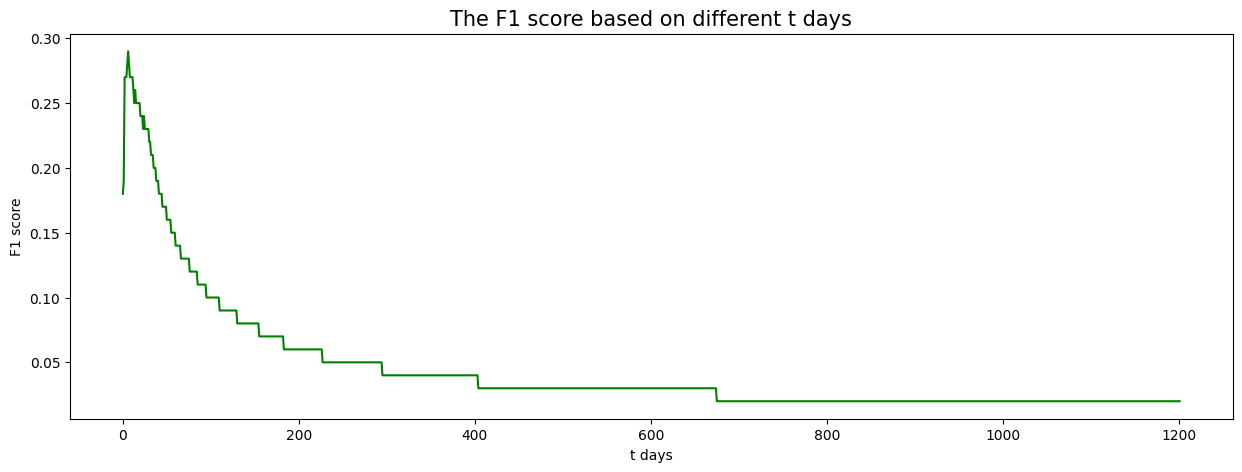

In [51]:
### Plot the F1 score based on each t days
fig = plt.figure(figsize = (15, 5))
AX1 = fig.add_subplot(1,1,1)

AX1.plot(t, all_F1_score, ls = "-", color = "green")

AX1.set_title("The F1 score based on different t days", fontsize = 15, horizontalalignment="center")

AX1.set_xlabel("t days", fontsize = 10)
AX1.set_ylabel("F1 score", fontsize = 10)


In [52]:
### Find out the sensible t of this model
for i in range(len(all_F1_score)):
    if all_F1_score[i] == max(all_F1_score):
        print("The sensible t is " + str(i))
        print("The detection rate is " + str(d[i]) + "%")
        print("The hit rate is " + str(h[i]) + "%")
        print("The F1 score of the model is " + str(all_F1_score[i]))

The sensible t is 6
The detection rate is 2.04%
The hit rate is 21.7%
The F1 score of the model is 0.29


# Task 4
# Model 2: Decision Tree

In [53]:
# Have a glimpse at the dataset
df_insurance_claims

,PolicyholderOccupation,LossDate,FirstPolicySubscriptionDate,ClaimCause,FirstPartyVehicleType,ConnectionBetweenParties,PolicyWasSubscribedOnInternet,NumberOfPoliciesOfPolicyholder,FpVehicleAgeMonths,EasinessToStage,...,Fire,MaterialDamages,MedicalCare,NaturalCatastrophes,ReplacementVehicle,RiderClothes,Theft,ThirdParty,ThirdPartyMaterialDamages,Windscreen
0,CivilServant,2019-01-02,2018-06-18,CollisionWithAnimal,Car,noconnection,1,1,104.0,0.25,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Worker,2019-01-02,2017-06-29,LossOfControl,Car,noconnection,0,3,230.0,0.50,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Worker,2019-01-02,2017-02-05,AccidentWithIdentifiedThirdParty,Car,noconnection,0,9,93.0,0.25,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,CivilServant,2019-01-02,2017-01-21,AccidentWithIdentifiedThirdParty,Car,noconnection,0,2,56.0,0.25,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,Farmer,2019-01-02,2018-01-13,AccidentWithIdentifiedThirdParty,Car,noconnection,0,4,110.0,0.25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11525,Employee,2021-02-17,2019-03-15,WindscreenDamage,Car,noconnection,0,1,85.0,0.50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11526,Employee,2021-03-07,2017-07-20,WindscreenDamage,Car,noconnection,0,3,119.0,0.50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11527,Employee,2021-03-15,2020-09-30,WindscreenDamage,Car,noconnection,0,4,139.0,0.50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11528,CivilServant,2021-03-06,2018-12-28,WindscreenDamage,Car,noconnection,0,6,105.0,0.50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [54]:
df_insurance_claims.isna().sum()

PolicyholderOccupation             340
LossDate                             0
FirstPolicySubscriptionDate          0
ClaimCause                         191
FirstPartyVehicleType               12
ConnectionBetweenParties             0
PolicyWasSubscribedOnInternet        0
NumberOfPoliciesOfPolicyholder       0
FpVehicleAgeMonths                   0
EasinessToStage                      0
ClaimWihoutIdentifiedThirdParty      0
ClaimAmount                          0
LossHour                            94
PolicyHolderAge                     36
NumberOfBodilyInjuries               0
FirstPartyLiability                  0
Fraud                                0
Days                                 0
PolicyHolderCount                    0
Accessories                        189
ActLiability                       189
Burglary                           189
Fire                               189
MaterialDamages                    189
MedicalCare                        189
NaturalCatastrophes      

In [55]:
# Remove the columns that have too many missing values and unnecessary comlumns such as Reference ID, PolicyHolderPostcode
df_insurance_claims.drop(columns = [
                                    "LossDate",
                                    "FirstPolicySubscriptionDate"             
                                    ], inplace=True)

In [56]:
# Removing the mising values
df_insurance_claims = df_insurance_claims[(df_insurance_claims.PolicyholderOccupation.notnull()) &
                                          (df_insurance_claims.ClaimCause.notnull()) &
                                        #   (df_insurance_claims.ClaimInvolvedCovers.notnull()) &
                                          (df_insurance_claims.FirstPartyVehicleType.notnull()) &
                                          (df_insurance_claims.FpVehicleAgeMonths.notnull()) &
                                          (df_insurance_claims.LossHour.notnull()) &
                                          (df_insurance_claims.PolicyHolderAge.notnull())
                                          ].reset_index()

In [57]:
df_insurance_claims_clean = df_insurance_claims.drop(columns = ["index"])
df_insurance_claims_clean

,PolicyholderOccupation,ClaimCause,FirstPartyVehicleType,ConnectionBetweenParties,PolicyWasSubscribedOnInternet,NumberOfPoliciesOfPolicyholder,FpVehicleAgeMonths,EasinessToStage,ClaimWihoutIdentifiedThirdParty,ClaimAmount,...,Fire,MaterialDamages,MedicalCare,NaturalCatastrophes,ReplacementVehicle,RiderClothes,Theft,ThirdParty,ThirdPartyMaterialDamages,Windscreen
0,CivilServant,CollisionWithAnimal,Car,noconnection,1,1,104.0,0.25,1,4624.73,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Worker,LossOfControl,Car,noconnection,0,3,230.0,0.50,1,1606.81,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Worker,AccidentWithIdentifiedThirdParty,Car,noconnection,0,9,93.0,0.25,0,998.20,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,CivilServant,AccidentWithIdentifiedThirdParty,Car,noconnection,0,2,56.0,0.25,0,2506.92,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,Farmer,AccidentWithIdentifiedThirdParty,Car,noconnection,0,4,110.0,0.25,0,12.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10885,Employee,WindscreenDamage,Car,noconnection,0,1,85.0,0.50,1,1010.23,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10886,Employee,WindscreenDamage,Car,noconnection,0,3,119.0,0.50,1,154.35,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10887,Employee,WindscreenDamage,Car,noconnection,0,4,139.0,0.50,1,420.25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10888,CivilServant,WindscreenDamage,Car,noconnection,0,6,105.0,0.50,1,96.40,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [58]:
# Check the datatype of each column
df_insurance_claims_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10890 entries, 0 to 10889
Data columns (total 30 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   PolicyholderOccupation           10890 non-null  object 
 1   ClaimCause                       10890 non-null  object 
 2   FirstPartyVehicleType            10890 non-null  object 
 3   ConnectionBetweenParties         10890 non-null  object 
 4   PolicyWasSubscribedOnInternet    10890 non-null  int64  
 5   NumberOfPoliciesOfPolicyholder   10890 non-null  int64  
 6   FpVehicleAgeMonths               10890 non-null  float64
 7   EasinessToStage                  10890 non-null  float64
 8   ClaimWihoutIdentifiedThirdParty  10890 non-null  int64  
 9   ClaimAmount                      10890 non-null  float64
 10  LossHour                         10890 non-null  float64
 11  PolicyHolderAge                  10890 non-null  float64
 12  NumberOfBodilyInju

In [59]:
# Check categorical data
df_insurance_claims_clean[["PolicyholderOccupation","ClaimCause", "FirstPartyVehicleType"]]

,PolicyholderOccupation,ClaimCause,FirstPartyVehicleType
0,CivilServant,CollisionWithAnimal,Car
1,Worker,LossOfControl,Car
2,Worker,AccidentWithIdentifiedThirdParty,Car
3,CivilServant,AccidentWithIdentifiedThirdParty,Car
4,Farmer,AccidentWithIdentifiedThirdParty,Car
...,...,...,...
10885,Employee,WindscreenDamage,Car
10886,Employee,WindscreenDamage,Car
10887,Employee,WindscreenDamage,Car
10888,CivilServant,WindscreenDamage,Car


In [60]:
# Get dummy variables for categorical data
df_insurance_claims_clean = pd.get_dummies(df_insurance_claims_clean , drop_first=True, columns=["PolicyholderOccupation","ClaimCause","FirstPartyVehicleType", "ConnectionBetweenParties"])
df_insurance_claims_clean = df_insurance_claims_clean.dropna()
df_insurance_claims_clean

,PolicyWasSubscribedOnInternet,NumberOfPoliciesOfPolicyholder,FpVehicleAgeMonths,EasinessToStage,ClaimWihoutIdentifiedThirdParty,ClaimAmount,LossHour,PolicyHolderAge,NumberOfBodilyInjuries,FirstPartyLiability,...,ClaimCause_Vandalism,ClaimCause_WindscreenDamage,FirstPartyVehicleType_Caravan,FirstPartyVehicleType_Motorcycle,FirstPartyVehicleType_PrivateCar,ConnectionBetweenParties_SameBankAccount,ConnectionBetweenParties_SameEmail,ConnectionBetweenParties_SamePhone,ConnectionBetweenParties_SamePolice,ConnectionBetweenParties_noconnection
0,1,1,104.0,0.25,1,4624.73,8.0,45.0,0,1.0,...,0,0,0,0,0,0,0,0,0,1
1,0,3,230.0,0.50,1,1606.81,11.0,20.0,0,1.0,...,0,0,0,0,0,0,0,0,0,1
2,0,9,93.0,0.25,0,998.20,18.0,32.0,0,0.5,...,0,0,0,0,0,0,0,0,0,1
3,0,2,56.0,0.25,0,2506.92,11.0,46.0,0,0.5,...,0,0,0,0,0,0,0,0,0,1
4,0,4,110.0,0.25,0,12.00,12.0,28.0,0,0.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10885,0,1,85.0,0.50,1,1010.23,0.0,56.0,0,0.0,...,0,1,0,0,0,0,0,0,0,1
10886,0,3,119.0,0.50,1,154.35,0.0,54.0,0,0.0,...,0,1,0,0,0,0,0,0,0,1
10887,0,4,139.0,0.50,1,420.25,0.0,34.0,0,0.0,...,0,1,0,0,0,0,0,0,0,1
10888,0,6,105.0,0.50,1,96.40,0.0,58.0,0,0.0,...,0,1,0,0,0,0,0,0,0,1


Modelling

In [181]:
def grid_search(model, parameters, X_train, X_valid, y_train, y_valid, primary_metric='roc_auc'):
    # Find the best combination of model parameters using cross validation
    clf = GridSearchCV(
        model, 
        parameters,
        cv=3,
        scoring=['neg_log_loss', 'precision', 'roc_auc', 'accuracy'],
        refit=primary_metric,
    )

    clf = clf.fit(X_train, y_train)

    print('best_params: ', clf.best_params_)

    # Evaluate the model's metrics
    print('--CROSS VALIDATION--')
    print('precision:', np.round(clf.cv_results_['mean_test_precision'][clf.best_index_], 3))
    print('roc_auc:', np.round(clf.cv_results_['mean_test_roc_auc'][clf.best_index_], 3))
    print('log_loss:', -np.round(clf.cv_results_['mean_test_neg_log_loss'][clf.best_index_], 3))
    print('accuracy:', np.round(clf.cv_results_['mean_test_accuracy'][clf.best_index_], 3))
    
    print('--VALIDATION--')
    y_pred_valid = clf.predict(X_valid)
    y_pred_valid_prob = clf.predict_proba(X_valid)[:, 1]
    print('precision:', np.round(precision_score(y_valid, y_pred_valid), 3))
    print('roc_auc:', np.round(roc_auc_score(y_valid, y_pred_valid_prob), 3))
    print('log_loss:', np.round(log_loss(y_valid, y_pred_valid_prob), 3))
    print('accuracy:', np.round(accuracy_score(y_valid, y_pred_valid), 3))

    return clf

In [182]:
X = df_insurance_claims_clean.drop(columns = ["Fraud"], axis=1)
y = df_insurance_claims_clean["Fraud"]

In [183]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=120)

# Separate the data into training/validation/testing with percentages 60%/20%/20%
X_train, X_other, y_train, y_other = train_test_split(X, y, train_size=0.6, random_state=242)
X_test, X_valid, y_test, y_valid = train_test_split(X_other, y_other, train_size = 0.5, random_state=135)

print(f'Training on {len(X_train)} observations, validating on {len(X_valid)} and testing on {len(X_test)} observations')
print('Number of features:', len(X_train.columns))

Training on 6533 observations, validating on 2178 and testing on 2178 observations
Number of features: 60


In [184]:
# Fit the model
# To prevent the model from classifying everything as negative, we used the balanced class weight
model = DecisionTreeClassifier(random_state=345)

parameters = {
    'max_depth': [3, 4, 5, 6, 7, 10, None],
    'min_samples_split': [0.05, 0.1, 0.2],
    'class_weight': ['balanced']
}

clf = grid_search(model, parameters, X_train, X_valid, y_train, y_valid)

best_params:  {'class_weight': 'balanced', 'max_depth': 3, 'min_samples_split': 0.05}
--CROSS VALIDATION--
precision: 0.132
roc_auc: 0.944
log_loss: 0.18
accuracy: 0.933
--VALIDATION--
precision: 0.132
roc_auc: 0.934
log_loss: 0.181
accuracy: 0.939


precision: 0.094
roc_auc: 0.913
log_loss: 0.242
accuracy: 0.924
recall: 0.895
f1 score: 0.171


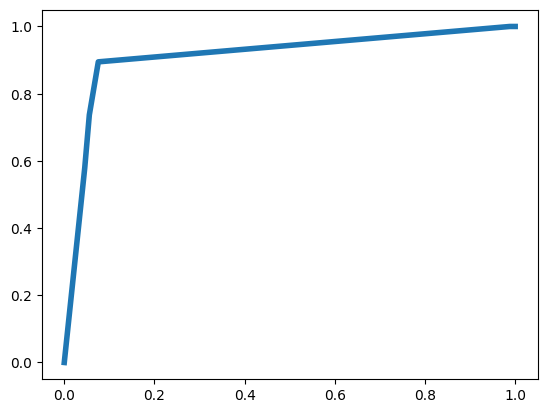

In [185]:
# retrain the model
trainX_final=pd.concat([X_train, X_valid])
trainY_final=pd.concat([y_train, y_valid])
best_model = DecisionTreeClassifier(**clf.best_params_).fit(trainX_final, trainY_final)
y_pred_test = best_model.predict(X_test)
y_pred_test_prob = best_model.predict_proba(X_test)[:, 1]

print('precision:', np.round(precision_score(y_test, y_pred_test), 3))
print('roc_auc:', np.round(roc_auc_score(y_test, y_pred_test_prob), 3))
print('log_loss:', np.round(log_loss(y_test, y_pred_test_prob), 3))
print('accuracy:', np.round(accuracy_score(y_test, y_pred_test), 3))
print('recall:', np.round(recall_score(y_test, y_pred_test), 3))
print('f1 score:', np.round(f1_score(y_test, y_pred_test), 3))

fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_prob)
plt.plot(fpr, tpr, linewidth=4)
plt.show()

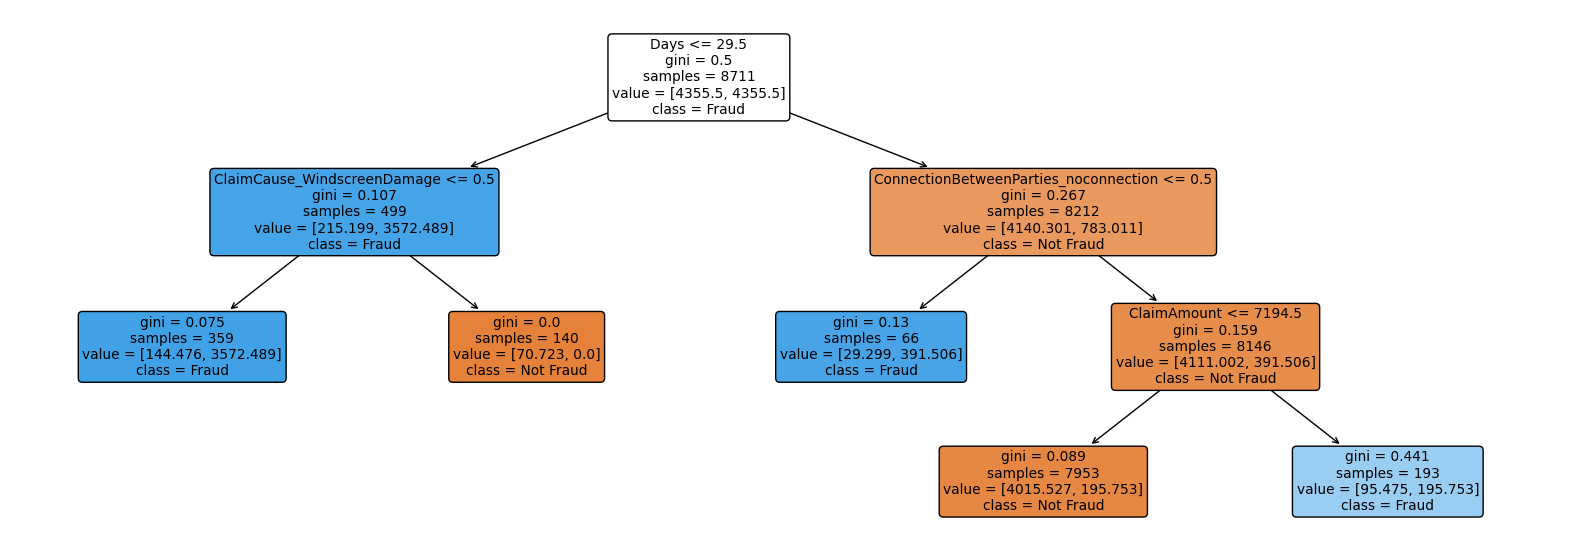

In [186]:
# Plot the tree
plt.figure(figsize=(20, 7))
plot_tree(best_model, feature_names=X_train.columns, filled=True, rounded=True, class_names=["Not Fraud","Fraud"])
plt.show()


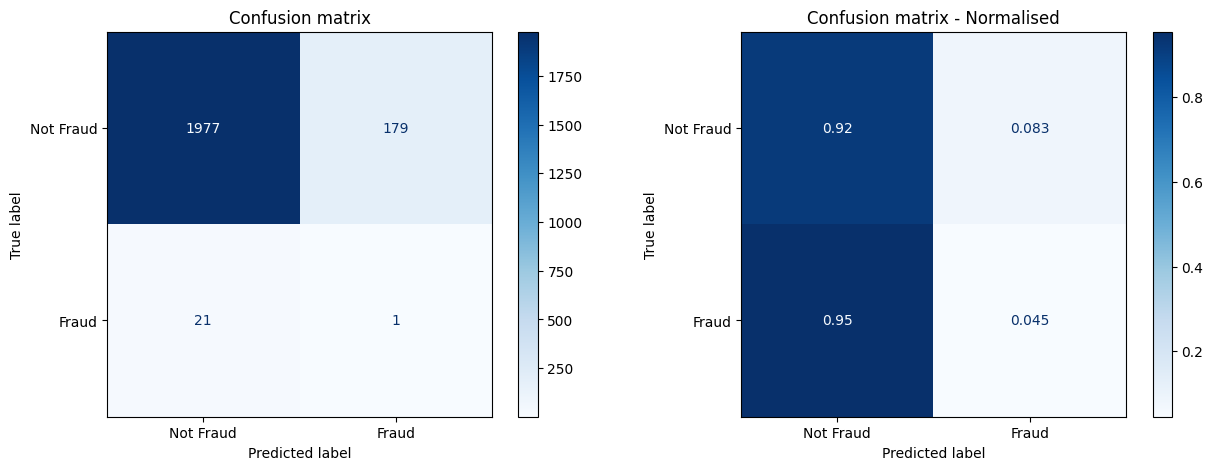

In [187]:
# Confusion matrix
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
cm = confusion_matrix(y_valid, y_pred_test)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.from_predictions(y_valid, y_pred_test, normalize=None, ax=axs[0], display_labels=['Not Fraud', 'Fraud'], cmap='Blues')
axs[0].set_title('Confusion matrix')
disp.from_predictions(y_valid, y_pred_test, normalize='true', ax=axs[1], display_labels=['Not Fraud', 'Fraud'], cmap='Blues')
axs[1].set_title('Confusion matrix - Normalised')
plt.show()

In [188]:
# Final model
X_final = pd.concat([X_train, X_test], ignore_index=True)
y_final = pd.concat([y_train, y_test], ignore_index=True)

final_model = DecisionTreeClassifier(**clf.best_params_, random_state=42).fit(X_final, y_final)

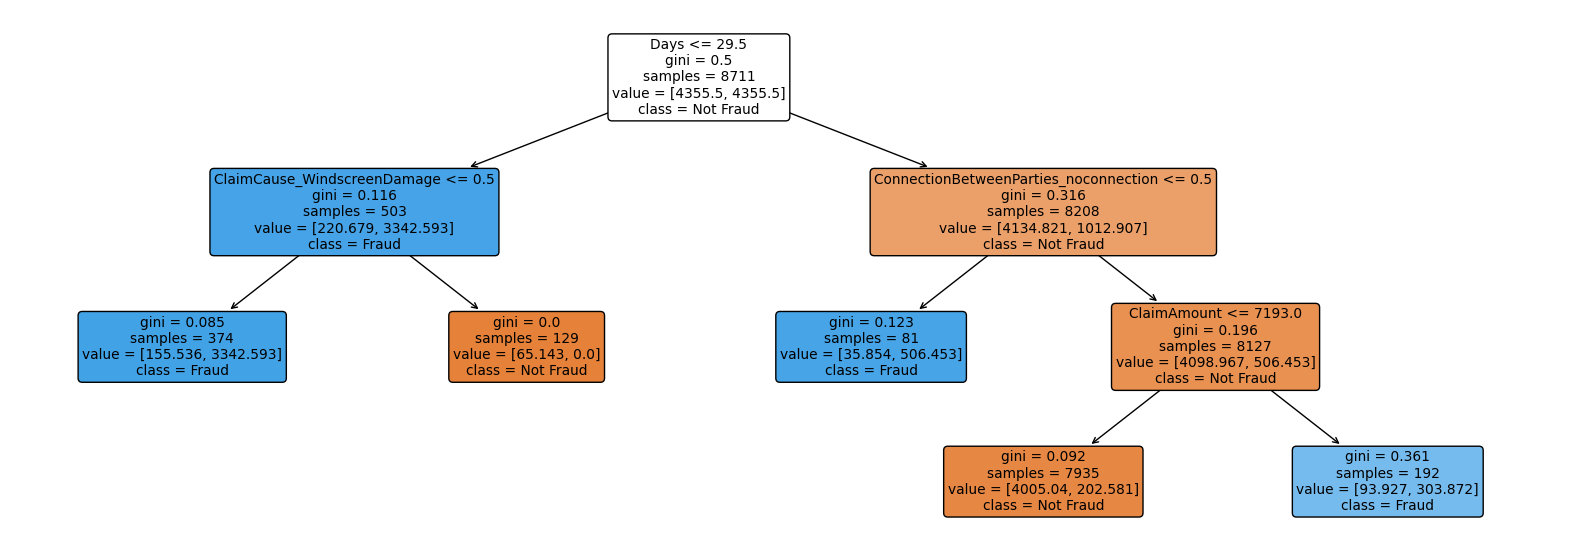

In [189]:
# Plot the final Decision tree model after retraining
plt.figure(figsize=(20, 7))
plot_tree(final_model, feature_names=X_train.columns, filled=True, rounded=True, class_names=["Not Fraud","Fraud"])
plt.show()

Calculate the detection rates and hit rates

In [190]:
len(y_pred_test)

2178

In [191]:
len(y_test)

2178

In [192]:
a = 0
b = 0
for i, o in zip(y_test, y_pred_test):
    if o == 1:
        a += 1
    if i == 1 & o == 1:
        b += 1

Decision_Tree_d = round((a / len(y_pred_test))*100, 2)
Decision_Tree_h = round((b / a)*100, 2)
        

In [193]:
Decision_Tree_d

8.26

In [194]:
Decision_Tree_h

9.44

In [195]:
df_result = pd.DataFrame({"y_hat": y_pred_test,
                          "y": y_test})

df_result.to_csv("dt_result.csv")

### We decided to build a more complicated model, Random Forest particularly, to see if we can improve the performance of the Decision Tree Model.

## Model 3: Random Forest

In [169]:
# import Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

In [170]:
# Define parameters 
parameters = {
            'n_estimators': randint(100, 200),
            'max_depth': randint(5, 15),
            'class_weight': ['balanced']
}

# Create a random forest classifier
rf = RandomForestClassifier(random_state=135)

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = parameters, 
                                 n_iter=40, 
                                 cv=3,
                                 random_state=120,
                                 scoring='roc_auc')

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=135),
                   n_iter=40,
                   param_distributions={'class_weight': ['balanced'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f7addceb6d0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f7addd11390>},
                   random_state=120, scoring='roc_auc')

In [171]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'class_weight': 'balanced', 'max_depth': 14, 'n_estimators': 197}


In [ ]:
# retrain the model
trainX_final=pd.concat([X_train, X_valid])
trainY_final=pd.concat([y_train, y_valid])
best_model = rand_search.fit(trainX_final, trainY_final)
# Generate predictions with the best model
rf_y_pred = best_rf.predict(X_test)
rf_y_pred_prob = best_rf.predict_proba(X_test)[:, 1]

print('precision:', np.round(precision_score(y_test, y_pred_test), 3))
print('roc_auc:', np.round(roc_auc_score(y_test, y_pred_test_prob), 3))
print('log_loss:', np.round(log_loss(y_test, y_pred_test_prob), 3))
print('accuracy:', np.round(accuracy_score(y_test, y_pred_test), 3))
print('recall:', np.round(recall_score(y_test, y_pred_test), 3))
print('f1 score:', np.round(f1_score(y_test, y_pred_test), 3))

fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_prob)
plt.plot(fpr, tpr, linewidth=4)
plt.show()

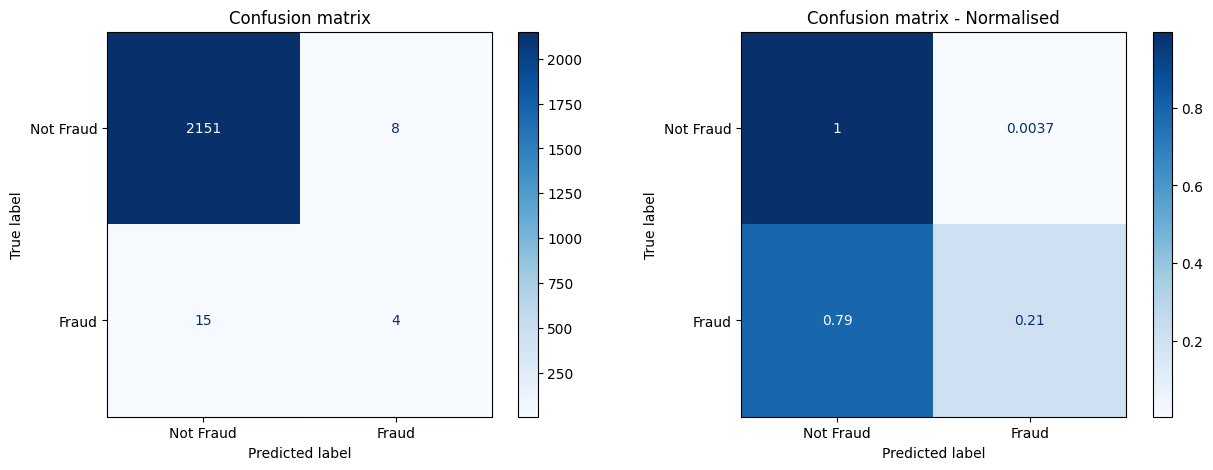

In [172]:
# # Generate predictions with the best model
# rf_y_pred = best_rf.predict(X_test)
# rf_y_pred_prob = best_rf.predict_proba(X_test)[:, 1]

# Confusion matrix
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
cm = confusion_matrix(y_test, rf_y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.from_predictions(y_test, rf_y_pred, normalize=None, ax=axs[0], display_labels=['Not Fraud', 'Fraud'], cmap='Blues')
axs[0].set_title('Confusion matrix')
disp.from_predictions(y_test, rf_y_pred, normalize='true', ax=axs[1], display_labels=['Not Fraud', 'Fraud'], cmap='Blues')
axs[1].set_title('Confusion matrix - Normalised')
plt.show()

In [173]:
# Calculate the performance metrics
accuracy = accuracy_score(y_test, rf_y_pred)
precision = precision_score(y_test, rf_y_pred)

print('roc_auc:', np.round(roc_auc_score(y_test, rf_y_pred_prob), 3))
print('recall:', np.round(recall_score(y_test, rf_y_pred), 3))
print('f1 score:', np.round(f1_score(y_test, rf_y_pred), 3))
print("Accuracy:", accuracy)
print("Precision:", precision)


roc_auc: 0.919
recall: 0.211
f1 score: 0.258
Accuracy: 0.9894398530762167
Precision: 0.3333333333333333


Calculate the hit rates and detection rates

In [174]:
len(rf_y_pred)

2178

In [175]:
len(y_test)

2178

In [176]:
a = 0
b = 0
for i, o in zip(y_test, rf_y_pred):
    if o == 1:
        a += 1
    if i == 1 & o == 1:
        b += 1

RF_d = round((a / len(rf_y_pred))*100, 2)
RF_h = round((b / a)*100, 2)

In [177]:
RF_h

33.33

In [178]:
RF_d

0.55

In [179]:
rf_result = pd.DataFrame({"y_hat": rf_y_pred,
                          "y": y_test})

rf_result.to_csv("rf_result.csv")

In [180]:
# Compare the detection rates and hit rates of the first 3 Models
pd.DataFrame(
    {
        'model': ['Heuristic Model', 'Decision Tree Model', 'Random Forest Model'],
        'hit rate': [h[29], Decision_Tree_h, RF_h],
        'detection rate': [d[29], Decision_Tree_d, RF_d]
    }
)

,model,hit rate,detection rate
0,Heuristic Model,13.16,5.94
1,Decision Tree Model,9.44,8.26
2,Random Forest Model,33.33,0.55


From the comparison above, it can be seen that:
- Decision Tree model is the most "aggressive" model. It has the highest detection rate but lowest hit rate. It flags the highest number of suspicious cases that turn out to be not fraud.
- Random Forest model is the least "aggressive" one - its detection rate is significantly lower than others' but the hit rate is significantly higher, which means its fraud prediction is more reliable.  If this model is implemented, it will result in the least number of false alarms which can be helpful in maintaining trust relationship with customers.

We continue to build the Neural Network model in the next parts to see if it can outperform the three mentioned models. 

## Task 5: Model 4 - The Neural Network Model

In [597]:
df_insurance_claims_model_4 = df_insurance_claims_clean.reset_index()

In [598]:
df_insurance_claims_model_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10889 entries, 0 to 10888
Data columns (total 62 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   index                                          10889 non-null  int64  
 1   PolicyWasSubscribedOnInternet                  10889 non-null  int64  
 2   NumberOfPoliciesOfPolicyholder                 10889 non-null  int64  
 3   FpVehicleAgeMonths                             10889 non-null  float64
 4   EasinessToStage                                10889 non-null  float64
 5   ClaimWihoutIdentifiedThirdParty                10889 non-null  int64  
 6   ClaimAmount                                    10889 non-null  float64
 7   LossHour                                       10889 non-null  float64
 8   PolicyHolderAge                                10889 non-null  float64
 9   NumberOfBodilyInjuries                         108

#### Build up the Neural Network Model

In [632]:
tf.keras.backend.clear_session()
np.random.seed(121)
tf.random.set_seed(111)

In [633]:
# Set up the input and output of the model
X = df_insurance_claims_model_4.iloc[:,0:15]
y = df_insurance_claims_model_4.iloc[:,15]

In [634]:
# Separate the data into training/validation/testing with percentages 60%/20%/20%
X_train, X_other, y_train, y_other = train_test_split(X, y, train_size=0.6, random_state=242)
X_test, X_valid, y_test, y_valid = train_test_split(X_other, y_other, train_size = 0.5, random_state=135)


In [635]:
# Standardize the input data value into a standard format
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [636]:
# Number of units: Needs to be large. 64, 128, and 256 are all sensible choics
# batch norm seems to yields better performance than dropout
# Number of hidden layers: at least 2 because it's a deep neural network

def nerual_network_model(hp):
    num_units = hp.Choice('num_units', [64, 128]) 
    dropout_rate = hp.Float('dropout_rate', min_value = 0.1, max_value = 0.5)
    learning_rate = hp.Float('learning_rate', min_value = 0.01, max_value = 0.1, sampling = 'log')
    
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(num_units, activation="relu"),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(num_units, activation="relu"),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(1, activation="sigmoid")
    ])
    
    model.compile(
        optimizer=tf.keras.optimizers.experimental.Adam(learning_rate = learning_rate),
        loss='binary_crossentropy',
        metrics=['accuracy', tf.keras.metrics.AUC()]
    )
                
    return model

In [637]:
# Find the optimal parameters for the model
tuner = kt.Hyperband(nerual_network_model,
                     objective='val_loss',
                     max_epochs=10,
                     factor=3,
                     directory='logs',
                     project_name='Nlll',
                     overwrite=True)

In [638]:
tuner.search(X_train, y_train, validation_data=(X_valid,y_valid))

Trial 30 Complete [00h 00m 11s]
val_loss: 0.22245942056179047

Best val_loss So Far: 0.21962732076644897
Total elapsed time: 00h 03m 21s
INFO:tensorflow:Oracle triggered exit


In [639]:
best_hps = tuner.get_best_hyperparameters()[0]
print("Best number of hidden units:", best_hps['num_units'])
print("Best dropout rate:", best_hps['dropout_rate'])
print("Best learning rate:", best_hps['learning_rate'])

Best number of hidden units: 64
Best dropout rate: 0.15713391783787115
Best learning rate: 0.010628741932113574


In [640]:
best_model = tuner.hypermodel.build(best_hps)

In [641]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(
    patience=10,
    restore_best_weights=True
)

In [642]:
log = best_model.fit(X_train, y_train, epochs=30, batch_size = 64, validation_data=(X_valid,y_valid), callbacks=[early_stopping_cb])

Epoch 1/30
103/103 [==============================] - 6s 20ms/step - loss: 0.3236 - accuracy: 0.8780 - auc_1: 0.9314 - val_loss: 0.2493 - val_accuracy: 0.9096 - val_auc_1: 0.9594
Epoch 2/30
103/103 [==============================] - 1s 13ms/step - loss: 0.2766 - accuracy: 0.8941 - auc_1: 0.9462 - val_loss: 0.2442 - val_accuracy: 0.9137 - val_auc_1: 0.9589
Epoch 3/30
103/103 [==============================] - 1s 9ms/step - loss: 0.2712 - accuracy: 0.8970 - auc_1: 0.9476 - val_loss: 0.2328 - val_accuracy: 0.9146 - val_auc_1: 0.9566
Epoch 4/30
103/103 [==============================] - 1s 8ms/step - loss: 0.2767 - accuracy: 0.8974 - auc_1: 0.9461 - val_loss: 0.2369 - val_accuracy: 0.9160 - val_auc_1: 0.9631
Epoch 5/30
103/103 [==============================] - 1s 9ms/step - loss: 0.2707 - accuracy: 0.8987 - auc_1: 0.9484 - val_loss: 0.2297 - val_accuracy: 0.9155 - val_auc_1: 0.9604
Epoch 6/30
103/103 [==============================] - 1s 10ms/step - loss: 0.2641 - accuracy: 0.9002 - auc_1

In [665]:
best_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_2 (Dropout)         (None, 15)                0         
                                                                 
 dense_3 (Dense)             (None, 64)                1024      
                                                                 
 batch_normalization_2 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 batch_normalization_3 (Batc  (None, 64)               256       
 hNormalization)                                      

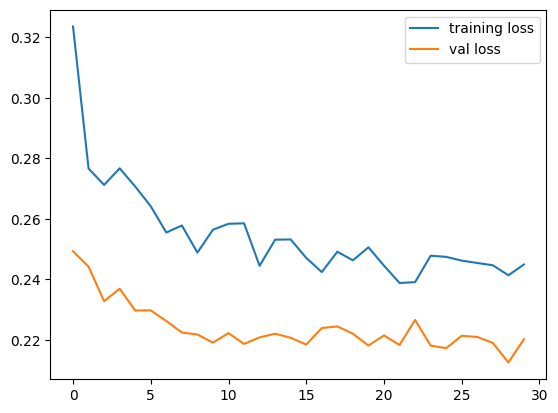

In [666]:
plt.plot(log.history['loss'],label = "training loss")
plt.plot(log.history['val_loss'], label = "val loss")
plt.legend()
plt.show()

Model is overfitting even though we've used batch normalisation or dropout which is supposed to address this. This is likely because the training dataset is not representative of the test set, which is quite common for imbalanced classification problems when the number of frauds is low. It's also possible that the size of the training dataset is not big enough to train a deep neural network.

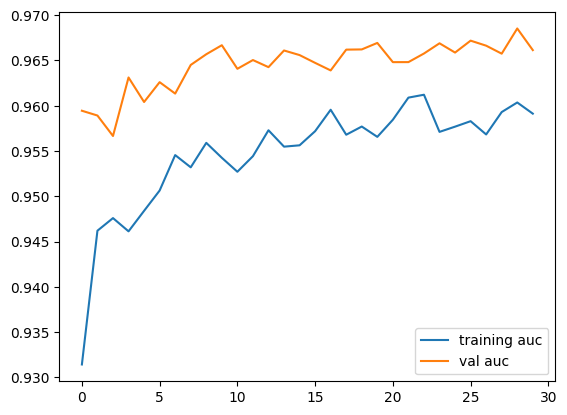

In [667]:
plt.plot(log.history['auc_1'],label = "training auc")
plt.plot(log.history['val_auc_1'], label = "val auc")
plt.legend()
plt.show()

#### Test the model

In [668]:
y_predict = best_model.predict(X_test)

69/69 [==============================] - 0s 2ms/step


In [669]:
len(y_predict)

2178

In [670]:
# set up the range of threshold
threshold = np.arange(0, 1, 0.01)

In [671]:
def predict(threshold, y_hat):
    all_y_prediction = []
    for i in range(len(threshold)):
        y_prediction = []
        for o in range(len(y_hat)):
            if y_hat[o] >= threshold[i]:
                y = 1
                y_prediction.append(y)
            else:
                y = 0
                y_prediction.append(y)
        all_y_prediction.append(y_prediction)
    return all_y_prediction

In [672]:
all_y_prediction = predict(threshold, y_predict)

In [673]:
len(all_y_prediction[1])

2178

In [674]:
def get_detection_rate_and_hit_rate_model_4(all_y_prediction, y_test):
    
    # All_detection rate
    d = []
    # All hit rate
    h = []
    
    for i in range(len(all_y_prediction)):
        
        # The number of detection
        a = 0
        # The number of real fraud
        b = 0
        
        for o, n in zip(all_y_prediction[i], y_test):
            if o == 1:
                a = a + 1
                if n == 1:
                    b = b + 1
            else:
                pass
            
        if a == 0:
            detection_rate = 0
            d.append(detection_rate)
            hit_rate = 0
            h.append(hit_rate)
        else:
            detection_rate = round((a / len(y_test))*100, 2)
            d.append(detection_rate)
            hit_rate = round((b / a)*100, 2)
            h.append(hit_rate)

    
    return d, h

In [675]:
model4_d, model4_h = get_detection_rate_and_hit_rate_model_4(all_y_prediction, y_test)

In [676]:
def get_all_roc_accuracy(y, y_hat):
    all_roc_acc = []
    for i in range(len(y_hat)):
        roc_acc = round(metrics.roc_auc_score(y, y_hat[i]), 2)
        all_roc_acc.append(roc_acc)
    return all_roc_acc

In [677]:
# ROC Accuracy
get_all_roc_accuracy = get_all_roc_accuracy(y_test, all_y_prediction)

Text(0, 0.5, 'ROC accuracy')

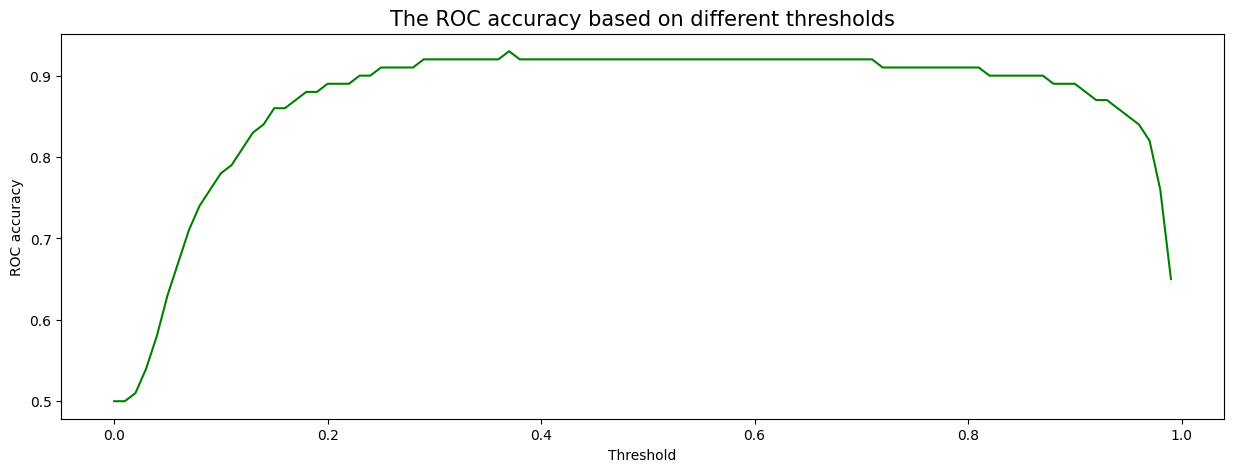

In [678]:
fig = plt.figure(figsize = (15, 5))
AX1 = fig.add_subplot(1,1,1)

AX1.plot(threshold, get_all_roc_accuracy, ls = "-", color = "green")

AX1.set_title("The ROC accuracy based on different thresholds", fontsize = 15, horizontalalignment="center")

AX1.set_xlabel("Threshold", fontsize = 10)
AX1.set_ylabel("ROC accuracy", fontsize = 10)

In [679]:
for i in range(len(get_all_roc_accuracy)):
    if get_all_roc_accuracy[i] == max(get_all_roc_accuracy):
        print("The threshold is " + str(threshold[i]))
        print("The detection rate is " + str(model4_d[i]) + "%")
        print("The hit rate is " + str(model4_h[i]) + "%")
        print("The ROC accuracy of the model is " + str(get_all_roc_accuracy[i]))

The threshold is 0.37
The detection rate is 55.56%
The hit rate is 96.12%
The ROC accuracy of the model is 0.93


In [680]:
def get_all_F1_score(y, y_hat):
    F1_score = []
    for i in range(len(y_hat)):
        F1 = round(metrics.f1_score(y, y_hat[i]), 2)
        F1_score.append(F1)
    return F1_score

In [681]:
# F1 score
get_all_F1_score = get_all_F1_score(y_test, all_y_prediction)

Text(0, 0.5, 'F1 score')

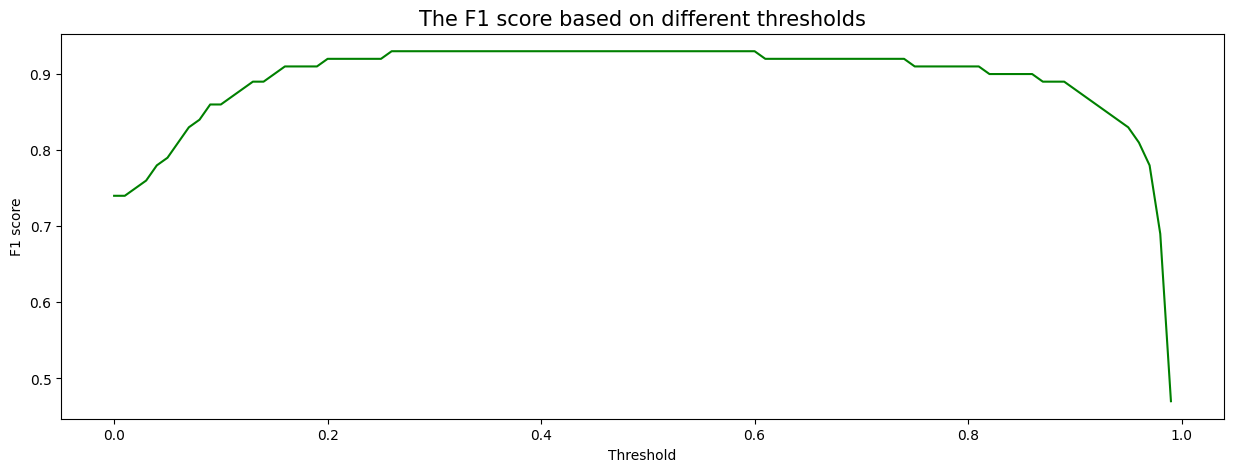

In [660]:
fig = plt.figure(figsize = (15, 5))
AX1 = fig.add_subplot(1,1,1)

AX1.plot(threshold, get_all_F1_score, ls = "-", color = "green")

AX1.set_title("The F1 score based on different thresholds", fontsize = 15, horizontalalignment="center")

AX1.set_xlabel("Threshold", fontsize = 10)
AX1.set_ylabel("F1 score", fontsize = 10)

In [661]:
for i in range(len(get_all_F1_score)):
    if get_all_F1_score[i] == max(get_all_F1_score):
        print("The threshold is " + str(threshold[i]))
        print("The detection rate is " + str(model4_d[i]) + "%")
        print("The hit rate is " + str(model4_h[i]) + "%")
        print("The F1 score of the model is " + str(get_all_F1_score[i]))

The threshold is 0.26
The detection rate is 59.04%
The hit rate is 92.61%
The F1 score of the model is 0.93
The threshold is 0.27
The detection rate is 58.77%
The hit rate is 92.97%
The F1 score of the model is 0.93
The threshold is 0.28
The detection rate is 58.17%
The hit rate is 93.61%
The F1 score of the model is 0.93
The threshold is 0.29
The detection rate is 57.71%
The hit rate is 94.03%
The F1 score of the model is 0.93
The threshold is 0.3
The detection rate is 57.21%
The hit rate is 94.62%
The F1 score of the model is 0.93
The threshold is 0.31
The detection rate is 56.84%
The hit rate is 94.83%
The F1 score of the model is 0.93
The threshold is 0.32
The detection rate is 56.43%
The hit rate is 95.28%
The F1 score of the model is 0.93
The threshold is 0.33
The detection rate is 56.29%
The hit rate is 95.51%
The F1 score of the model is 0.93
The threshold is 0.34
The detection rate is 56.11%
The hit rate is 95.66%
The F1 score of the model is 0.93
The threshold is 0.3500000000

In [662]:
threshold[2:13]

array([0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11, 0.12])

In [663]:
model4_d[2:13]

[99.54, 96.46, 93.02, 88.98, 85.67, 81.73, 78.97, 76.58, 75.02, 73.14, 71.35]

In [664]:
model4_h[2:13]

[59.41, 61.16, 63.43, 66.1, 68.6, 71.69, 73.72, 75.78, 77.17, 78.59, 80.18]